In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from astropy import units as u
from astropy import constants as const

from bokeh.layouts import gridplot, row, Spacer
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Span
from bokeh.transform import linear_cmap

# File path
file_path = "exoplanets_eu.csv"
df = pd.read_csv(file_path, quotechar='"', skipinitialspace=True)

In [2]:
df['mass_measurement_type']
df['detection_type']

0       Radial Velocity, Astrometry
1                   Radial Velocity
2       Radial Velocity, Astrometry
3                   Radial Velocity
4                   Radial Velocity
                   ...             
7334                Primary Transit
7335                         Timing
7336                Primary Transit
7337                Primary Transit
7338                Primary Transit
Name: detection_type, Length: 7339, dtype: object

In [3]:
P = df['orbital_period'][df['detection_type']=='Microlensing']
mass_star = df['star_mass'][df['detection_type']=='Microlensing']
mass_planet = df['mass'][df['detection_type']=='Microlensing']
DL = df['star_distance']

In [4]:
i=0
ang_sep={}
mass_ratio = {}
for i in tqdm(range(len(df))):
    # print((not pd.isna(df['star_mass'].iloc[i])) and (not pd.isna(df['mass'].iloc[i])))
    # if (not pd.isna(df['star_mass'].iloc[i])) and (not pd.isna(df['mass'].iloc[i])) and (not pd.isna(df['star_distance'].iloc[i])) and (not pd.isna(df['semi_major_axis'].iloc[i])):
    mp = df['mass'].iloc[i]*u.M_jup
    ms = df['star_mass'].iloc[i]*u.M_sun
    m = mp+ms
    q = mp/ms
    mass_ratio[df['name'].iloc[i]]=q.decompose()

    dl = df['star_distance'].iloc[i]*u.pc
    ds = 8*u.kpc
    pi_rel = abs(1/dl-1/ds)
    a = df['semi_major_axis'][df['detection_type']=='Microlensing'].iloc[0]
    k = 4*const.G/const.c**2
    theta_E = (np.sqrt(k*m*pi_rel).decompose())*(u.rad.to('uas'))
    alpha = (np.arctan(a*u.AU/dl).decompose()).to('uas').value
    s =(alpha/theta_E).decompose()
    # print(pi_rel)
    ang_sep[df['name'].iloc[i]]=s
        
    # elif 
# print(ang_sep)

df['alpha']=df['name'].map(ang_sep)
df['mass_ratio']=df['name'].map(mass_ratio)
# fit_rr['p_value'] = fit_rr['Source'].map(p_value_dict)

  0%|          | 0/7339 [00:00<?, ?it/s]

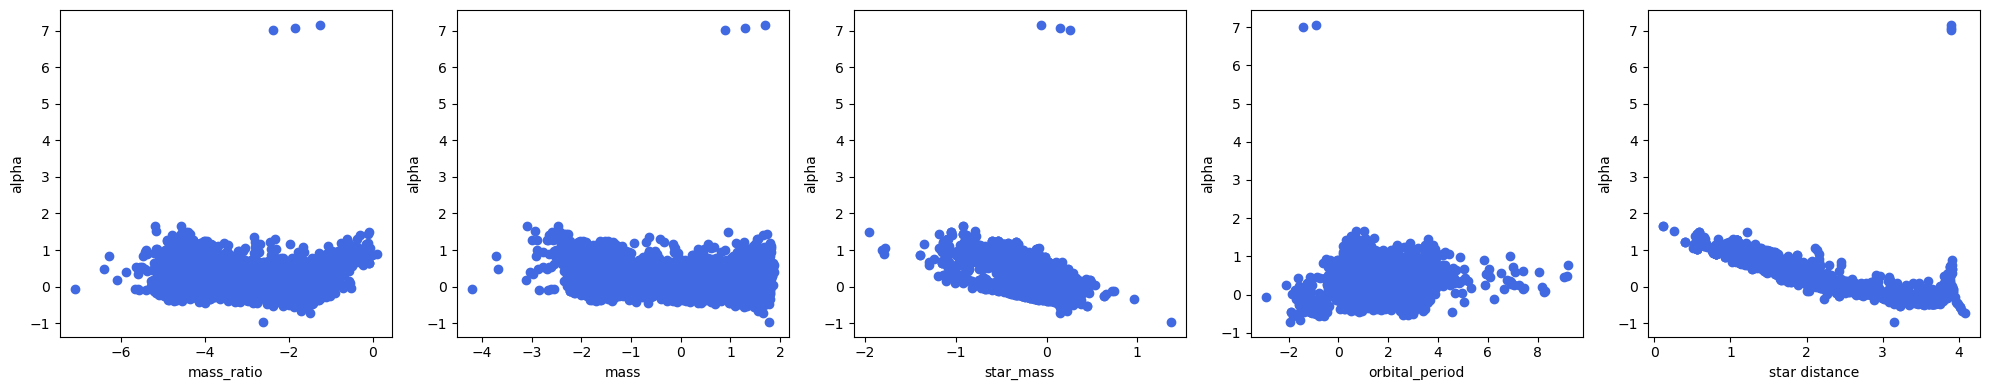

In [5]:

%matplotlib inline

def filter_nan(x, y):
    # Convert to numeric, forcing invalid values to NaN
    x = pd.to_numeric(x, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')
    
    # Ensure data is converted to float (to avoid any type-related issues)
    x = x.astype(float).to_numpy()
    y = y.astype(float).to_numpy()
    
    # Create mask to filter out NaN values in both x and y
    mask = ~np.isnan(x) & ~np.isnan(y)
    return x[mask], y[mask], mask  # Return mask as well


# Create subplots in a single row (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

C='royalblue'

# Scatter plot 1: mass_ratio vs alpha
x, y,mask = filter_nan(df['mass_ratio'], df['alpha'])
axes[0].scatter(np.log10(x), np.log10(y),color=C)
axes[0].set_xlabel('mass_ratio')
axes[0].set_ylabel('alpha')

# Scatter plot 2: mass vs alpha
x, y,mask = filter_nan(df['mass'], df['alpha'])
# print(len(y))
axes[1].scatter(np.log10(x), np.log10(y),color=C)
axes[1].set_xlabel('mass')
axes[1].set_ylabel('alpha')

# Scatter plot 3: star_mass vs alpha
x, y,mask= filter_nan(df['star_mass'], df['alpha'])
axes[2].scatter(np.log10(x), np.log10(y),color=C)
axes[2].set_xlabel('star_mass')
axes[2].set_ylabel('alpha')

# Scatter plot 4: orbital_period vs alpha
x, y,mask = filter_nan(df['orbital_period'], df['alpha'])
axes[3].scatter(np.log10(x), np.log10(y),color=C)
axes[3].set_xlabel('orbital_period')
axes[3].set_ylabel('alpha')

# Scatter plot 5: star_distance vs alpha
x, y,mask= filter_nan(df['star_distance'], df['alpha'])
axes[4].scatter(np.log10(x), np.log10(y),color=C)
axes[4].set_xlabel('star distance')
axes[4].set_ylabel('alpha')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


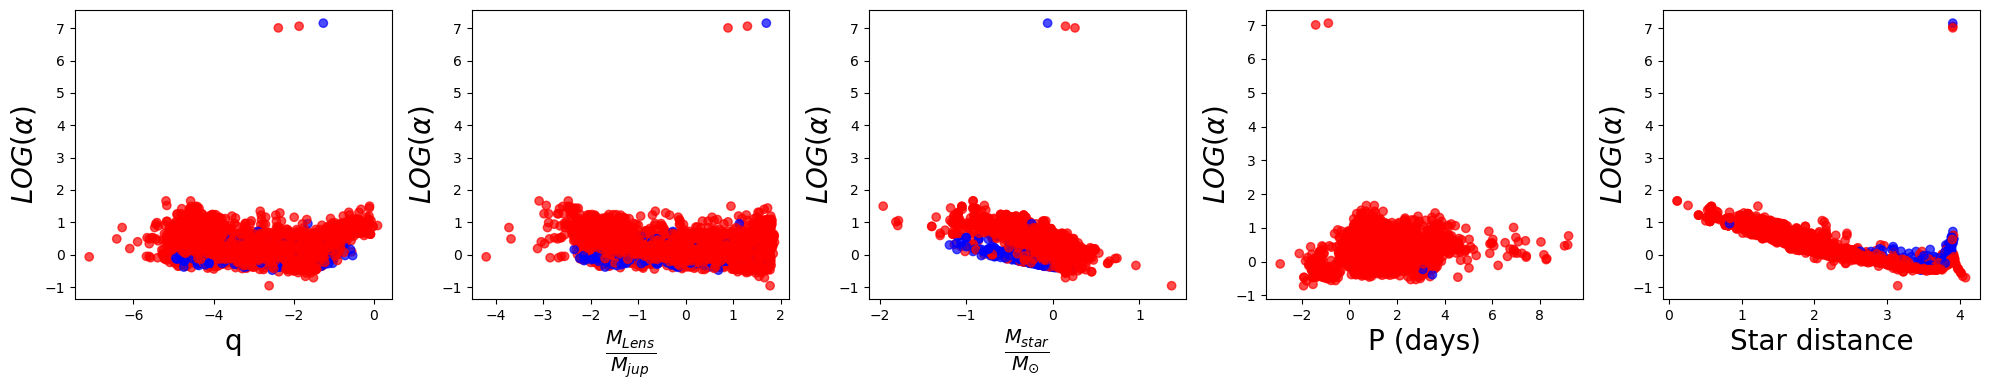

In [6]:


# Assume df is your DataFrame that includes the 'detection_type' column
# Create subplots in a single row (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Create a color mapping based on the detection type
colors = np.where(df['mass_measurement_type'] == 'Microlensing', 'blue', 'red')

# Scatter plot 1: mass_ratio vs alpha
x, y, mask = filter_nan(df['mass_ratio'], df['alpha'])
axes[0].scatter(np.log10(x), np.log10(y), color=colors[mask], alpha=0.7)  # Apply colors
axes[0].set_xlabel('q',fontsize=20)
axes[0].set_ylabel('$LOG(\\alpha)$',fontsize=20)

# Scatter plot 2: mass vs alpha
x, y, mask = filter_nan(df['mass'], df['alpha'])
axes[1].scatter(np.log10(x), np.log10(y), color=colors[mask], alpha=0.7)  # Apply colors
axes[1].set_xlabel(r'$\frac{M_{Lens}}{M_{jup}}$',fontsize=20)
axes[1].set_ylabel('$LOG(\\alpha)$',fontsize=20)

# Scatter plot 3: star_mass vs alpha
x, y, mask = filter_nan(df['star_mass'], df['alpha'])
axes[2].scatter(np.log10(x), np.log10(y), color=colors[mask], alpha=0.7)  # Apply colors
axes[2].set_xlabel(r'$\frac{M_{star}}{M_{\odot}}$',fontsize=20)
axes[2].set_ylabel('$LOG(\\alpha)$',fontsize=20)

# Scatter plot 4: orbital_period vs alpha
x, y, mask = filter_nan(df['orbital_period'], df['alpha'])
axes[3].scatter(np.log10(x), np.log10(y), color=colors[mask], alpha=0.7)  # Apply colors
axes[3].set_xlabel('P (days)',fontsize=20)
axes[3].set_ylabel('$LOG(\\alpha)$',fontsize=20)

# Scatter plot 5: star_distance vs alpha
x, y, mask = filter_nan(df['star_distance'], df['alpha'])
axes[4].scatter(np.log10(x), np.log10(y), color=colors[mask], alpha=0.7)  # Apply colors
axes[4].set_xlabel('Star distance',fontsize=20)
axes[4].set_ylabel('$LOG(\\alpha)$',fontsize=20)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [7]:
df['mass']

0        5.7430
1        0.0330
2        9.8660
3       16.1284
4       11.0873
         ...   
7334    19.0000
7335    50.0000
7336    61.0000
7337    23.0000
7338    26.0000
Name: mass, Length: 7339, dtype: float64

In [8]:

# Display Bokeh plots inline (if using Jupyter)
output_notebook()


# Define colors for each technique
color_mapping = {
    'Astrometry': 'green',
    'Microlensing': 'blue',
    'Radial Velocity': 'red',
    'Spectrum': 'purple',
    'TTV': 'orange',
    'Theoretical': 'yellow',
    'Timing': 'brown',
    np.nan: 'gray'  # For missing values (NaN)
}

# Apply color mapping to 'mass_measurement_type'
df['color'] = df['mass_measurement_type'].map(color_mapping)

# Create Bokeh figures without legends

def create_scatter_plot(x, y, x_label, y_label, df, log_scale=True):
    x, y, mask = filter_nan(df[x], df[y])
    
    if log_scale:
        x = np.log10(x)
        y = np.log10(y)
    
    # Set fill_alpha based on detection type
    fill_alpha = np.where(df['mass_measurement_type'][mask] == 'Microlensing', 1.0, 0.3)  # 1.0 for Microlensing, 0.3 for others
    
    source = ColumnDataSource(data={
        'x': x,
        'y': y,
        'color': df['color'][mask],
        'name': df['name'][mask],  # Include the planet names for hover
        'mass': df['mass'][mask],  # Include the planet masses for hover
        'alternate_names': df['mass'][mask],
        # 'molecules': df['mass'][mask],
        'star_name': df['star_name'][mask],
        'ra': df['ra'][mask],
        'dec': df['dec'][mask],
        'detection_type': df['detection_type'][mask],
        'mass_measurement_type': df['mass_measurement_type'][mask],
        'fill_alpha': fill_alpha  # Add fill_alpha to the data source
    })
    
    p = figure(width=290, height=290, x_axis_label=x_label, y_axis_label=y_label)
    
    # Draw the scatter points
    p.circle('x', 'y', source=source, size=8, color='color', fill_alpha='fill_alpha')  # Use fill_alpha from the source
    
    # Add hover tool to display planet name
    hover = HoverTool()
    hover.tooltips = [("Planet Name", "@name"), ("Mass (M_jup)", "@mass"),("Detection type", "@detection_type"), ("Ra", "@ra"), ("Dec", "@dec")]  # Only display planet names
    p.add_tools(hover)
    
    # Add horizontal lines at α = 0.5 and α = 2
    hline1 = Span(location=np.log10(0.5), dimension='width', line_color='red', line_width=2, line_dash='dashed')
    hline2 = Span(location=np.log10(2), dimension='width', line_color='blue', line_width=2, line_dash='dashed')
    
    p.add_layout(hline1)
    p.add_layout(hline2)

    return p


p1 = create_scatter_plot('mass_ratio', 'alpha', 'q', r'$$LOG(\alpha)$$', df)
p2 = create_scatter_plot('mass', 'alpha', r'$$M_{Lens}/M_{jup}$$', r'$$LOG(\alpha)$$', df)
p3 = create_scatter_plot('star_mass', 'alpha', r'$$M_{star}/M_{\odot}$$', r'$$LOG(\alpha)$$', df)
p4 = create_scatter_plot('orbital_period', 'alpha', 'P (days)', r'$$LOG(\alpha)$$', df)
p5 = create_scatter_plot('star_distance', 'alpha', 'Star distance', r'$$LOG(\alpha)$$', df)

# Create the grid of plots
grid = gridplot([[p1, p2, p3, p4, p5]])

# Create a separate figure for the legend
legend_fig = figure(width=150, height=400, title="Mass Measurement Types", toolbar_location=None)

# Hide axes in the legend box
legend_fig.axis.visible = False
legend_fig.grid.visible = False

# Add dummy circles to display colors in the legend
for technique, color in color_mapping.items():
    if technique is np.nan:
        technique = 'Unknown'  # Replace NaN label with 'Unknown'
    r = legend_fig.circle(x=[0], y=[0], size=10, color=color, legend_label=str(technique))

legend_fig.legend.location = "center"
legend_fig.legend.label_text_font_size = "10pt"

# Add a spacer for custom padding between grid and legend
spacer = Spacer(width=50)

# Combine the grid of plots and the legend figure with the spacer in a row
layout = row(grid, spacer, legend_fig)

# Show the final layout
show(layout)


Loading BokehJS ...

In [9]:
df['detection_type']

0       Radial Velocity, Astrometry
1                   Radial Velocity
2       Radial Velocity, Astrometry
3                   Radial Velocity
4                   Radial Velocity
                   ...             
7334                Primary Transit
7335                         Timing
7336                Primary Transit
7337                Primary Transit
7338                Primary Transit
Name: detection_type, Length: 7339, dtype: object

In [10]:
(df.columns).to_list()

['name',
 'planet_status',
 'mass',
 'mass_error_min',
 'mass_error_max',
 'mass_sini',
 'mass_sini_error_min',
 'mass_sini_error_max',
 'radius',
 'radius_error_min',
 'radius_error_max',
 'orbital_period',
 'orbital_period_error_min',
 'orbital_period_error_max',
 'semi_major_axis',
 'semi_major_axis_error_min',
 'semi_major_axis_error_max',
 'eccentricity',
 'eccentricity_error_min',
 'eccentricity_error_max',
 'inclination',
 'inclination_error_min',
 'inclination_error_max',
 'angular_distance',
 'discovered',
 'updated',
 'omega',
 'omega_error_min',
 'omega_error_max',
 'tperi',
 'tperi_error_min',
 'tperi_error_max',
 'tconj',
 'tconj_error_min',
 'tconj_error_max',
 'tzero_tr',
 'tzero_tr_error_min',
 'tzero_tr_error_max',
 'tzero_tr_sec',
 'tzero_tr_sec_error_min',
 'tzero_tr_sec_error_max',
 'lambda_angle',
 'lambda_angle_error_min',
 'lambda_angle_error_max',
 'impact_parameter',
 'impact_parameter_error_min',
 'impact_parameter_error_max',
 'tzero_vr',
 'tzero_vr_error_min

# We can check how many planets are in common with the Nasa Exoplanet Archive

In [11]:
import pandas as pd
# File path
file_path = "ML_2024.10.15_10.57.52.csv"
# Reading the CSV file with proper handling of quotes and commas
df = pd.read_csv(file_path, quotechar='"', comment='#', skipinitialspace=True)
# Display the dataframe to check if it's read correctly
display(df.head())
df.columns

,pl_name,rastr,ra,decstr,dec,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_masse,...,ml_radeinang,ml_radeinangerr1,ml_radeinangerr2,ml_radeinanglim,ml_pmrells,ml_pmrellserr1,ml_pmrellserr2,ml_pmrellslim,ml_modeldef,htmllink
0,KMT-2019-BLG-1953L b,17h56m27.90s,269.116250,-28d12m04.00s,-28.201111,NaN,NaN,NaN,0.0,NaN,...,0.250,0.020,-0.020,0.0,5.70,0.46,-0.46,0.0,0,<a refstr=HAN_ET_AL__2020 href=https://ui.adsa...
1,MOA-2013-BLG-605L b,17h58m42.85s,272.019257,-29d23m53.66s,-29.731583,0.06475,0.0018,-0.021,0.0,20.58,...,0.503,0.034,-0.034,0.0,9.03,0.63,-0.63,0.0,0,<a refstr=SUMI_ET_AL__2016 href=https://ui.ads...
2,KMT-2019-BLG-1953L b,17h56m27.90s,269.116250,-28d12m04.00s,-28.201111,NaN,NaN,NaN,0.0,NaN,...,0.250,0.020,-0.020,0.0,5.70,0.46,-0.46,0.0,0,<a refstr=HAN_ET_AL__2020 href=https://ui.adsa...
3,OGLE-2005-BLG-390L b,17h54m19.2s,268.579958,-30d22m38s,-30.377306,0.01700,0.0170,-0.009,0.0,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,<a refstr=BEAULIEU_ET_AL__2006 href=https://ui...
4,OGLE-2012-BLG-0950L b,18h08m04.62s,272.019257,-29d43m53.7s,-29.731583,0.11000,0.0300,-0.020,0.0,36.00,...,0.860,0.150,-0.060,0.0,4.60,0.90,-0.30,0.0,0,<a refstr=KOSHIMOTO_ET_AL__2017 href=https://u...


Index(['pl_name', 'rastr', 'ra', 'decstr', 'dec', 'pl_massj', 'pl_massjerr1',
       'pl_massjerr2', 'pl_massjlim', 'pl_masse', 'pl_masseerr1',
       'pl_masseerr2', 'pl_masselim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'st_mass', 'st_masserr1',
       'st_masserr2', 'st_masslim', 'sy_dist', 'sy_disterr1', 'sy_disterr2',
       'sy_distlim', 'ml_dists', 'ml_distserr1', 'ml_distserr2', 'ml_distslim',
       'ml_tsepmin', 'ml_tsepminerr1', 'ml_tsepminerr2', 'ml_tsepminlim',
       'ml_sepminnorm', 'ml_sepminnormerr1', 'ml_sepminnormerr2',
       'ml_sepminnormlim', 'ml_xtimeein', 'ml_xtimeeinerr1', 'ml_xtimeeinerr2',
       'ml_xtimeeinlim', 'ml_radsnorm', 'ml_radsnormerr1', 'ml_radsnormerr2',
       'ml_radsnormlim', 'ml_sepinsnorp', 'ml_sepinsnorperr1',
       'ml_sepinsnorperr2', 'ml_sepinsnorplim', 'ml_massratio',
       'ml_massratioerr1', 'ml_massratioerr2', 'ml_massratiolim',
       'ml_angstlax', 'ml_angstlaxerr1', 'ml_angstlaxerr2', 'ml_angstl

In [12]:
df['ml_massratio']=df['ml_massratio']*1e-4
df['ml_massratio']

0      0.001910
1      0.000312
2      0.001820
3      0.000076
4      0.000190
         ...   
736    0.001360
737    0.000071
738    0.000057
739    0.001090
740    0.000098
Name: ml_massratio, Length: 741, dtype: float64

In [13]:
df['htmllink'][0]

'<a refstr=HAN_ET_AL__2020 href=https://ui.adsabs.harvard.edu/abs/2020AJ....160...17H/abstract target=ref>Han et al. 2020</a>'

In [14]:

# len(df)

# DS
# df

from tqdm.auto import tqdm
i=0
# a = 
ang_sep={}
mass_ratio = {}
mass_star = {}
for i in tqdm(range(len(df))):
    mp = df['pl_massj'].iloc[i]*u.M_jup
    m = df['st_mass'].iloc[i]*u.M_sun#mp+ms
    q = df['ml_massratio'].iloc[i]#mp/ms
    m_star = m/(1+q)
    
    mass_star['pl_name']=m_star
    ds = df['ml_dists'].iloc[i]*u.pc
    dl = df['sy_dist'].iloc[i]*u.pc
    a = df['pl_orbsmax'].iloc[i]*u.AU#df['semi_major_axis'][df['detection_type']=='Microlensing'].iloc[0]
    k = 4*const.G/const.c**2
    
    pi_rel=1/dl-1/ds
    theta_E = (np.sqrt(k*m*pi_rel)*u.rad.to('mas')).decompose()
    # print(theta_E.decompose())
    # print(ds)
    # theta_E = df['ml_radeinang'].iloc[i]#(np.sqrt(k*m*pi_rel).decompose())*(u.rad.to('uas'))
    alpha = (np.arctan(a/dl).decompose()).to('mas').value
    
    s = alpha/theta_E
    # print(s)
    ang_sep[df['pl_name'].iloc[i]]=s
        
    # elif 
# print(ang_sep)

df['alpha']=df['pl_name'].map(ang_sep)
df['mass_ratio']=df['pl_name'].map(mass_ratio)

  0%|          | 0/741 [00:00<?, ?it/s]

In [15]:
# set(df['alpha'])

In [16]:

file_path = "ML_2024.10.15_10.57.52.csv"
df2 = pd.read_csv(file_path, quotechar='"', comment='#', skipinitialspace=True)['pl_name'].values
file_path = "exoplanets_eu.csv"
df = pd.read_csv(file_path, quotechar='"', skipinitialspace=True)['name'].values
# df2
# df

In [17]:
# Convert the arrays to sets and find the intersection
repeated_strings = set(df2) & set(df)

# Print the result
print(f"Repeated events: {repeated_strings}")

print(f"Number of events: {len(repeated_strings)}")

Repeated events: {'OGLE-2008-BLG-355L b', 'OGLE-2018-BLG-0677L b', 'KMT-2021-BLG-1077L c', 'OGLE-2014-BLG-0676L b', 'OGLE-2017-BLG-1522L b', 'KMT-2020-BLG-0414L b', 'KMT-2018-BLG-1988L b', 'OGLE-2014-BLG-0124L b', 'OGLE-2018-BLG-1700L b', 'OGLE-2014-BLG-1722L b', 'OGLE-2016-BLG-1190L b', 'MOA-2009-BLG-266L b', 'MOA-2019-BLG-008L b', 'OGLE-2019-BLG-1180L b', 'OGLE-2017-BLG-0173L b', 'MOA-2022-BLG-249L b', 'KMT-2020-BLG-0414L c', 'OGLE-2015-BLG-1771L b', 'MOA-bin-29 b', 'OGLE-2005-BLG-071L b', 'OGLE-2018-BLG-1011L b', 'MOA-2008-BLG-379L b', 'KMT-2021-BLG-1077L b', 'KMT-2018-BLG-1976L b', 'OGLE-2016-BLG-0263L b', 'K2-2016-BLG-0005L b', 'MOA-2016-BLG-319L b', 'MOA-2007-BLG-400L b', 'OGLE-2005-BLG-390L b', 'MOA-2007-BLG-192L b', 'KMT-2017-BLG-0165L b', 'KMT-2018-BLG-1292L b', 'OGLE-2014-BLG-1722L c', 'OGLE-2012-BLG-0026L b', 'MOA-bin-1L b', 'OGLE-2016-BLG-1195L b', 'OGLE-2013-BLG-0132L b', 'OGLE-2017-BLG-1691L b', 'KMT-2023-BLG-1431L b', 'OGLE-2007-BLG-368L b', 'OGLE-2013-BLG-0102L b', 'MOA